In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
from net import net
losses = []
net = net.to(device)
net.train()

Net(
  (pool1): MaxPool1d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv1): Conv1d(1, 10, kernel_size=(5,), stride=(1,), padding=(3,))
  (conv2): Conv1d(10, 20, kernel_size=(5,), stride=(1,), padding=(3,))
  (conv3): Conv1d(20, 10, kernel_size=(5,), stride=(1,), padding=(3,))
  (conv4): Conv1d(10, 1, kernel_size=(5,), stride=(1,), padding=(3,))
  (fc1): Linear(in_features=21, out_features=150, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=150, out_features=200, bias=True)
  (batch_norm): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=5, bias=True)
)

In [8]:
#Set hyperparameters
batch_size = 32
epochs = 500
lr=1e-4
weight_decay = 1e-4

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=lr, weight_decay=weight_decay)

In [9]:
#Get Train set
from train_set import train_set
train_set = train_set.to(device)

#Training loop
for epoch in range(epochs):
    
    #Set loss to zero
    running_loss = 0.0
    
    #Shuffle training set
    shuffled_train_set = train_set[torch.randperm(train_set.shape[0])]
    
    for start_index in range(0, shuffled_train_set.shape[0] - batch_size, batch_size):
        
        #get batches
        X = shuffled_train_set[start_index:start_index + batch_size, :-5].view(batch_size,1,285)
        y = shuffled_train_set[start_index:start_index + batch_size, -5:]
        
        #zero gradients
        optimizer.zero_grad()
        
        #forward pass
        outputs = net(X).view(batch_size,5)
        
        #get loss
        loss = criterion(outputs, y)
        
        #backward pass
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
#     print('{} epoch {} loss: {}'.format('YAH', epoch if epoch > len(losses) else len(losses), running_loss))
    
    if epoch % 50 == 49 or epoch == 0:    # print every 10 epochs
        print('{} epoch {} loss: {}'.format('', epoch if epoch > len(losses) else len(losses), running_loss))
    losses.append(running_loss)


 epoch 50 loss: 0.1105111762881279
 epoch 99 loss: 0.11100924760103226
 epoch 149 loss: 0.07296794652938843
 epoch 199 loss: 0.08110832795500755
 epoch 249 loss: 0.07562869228422642
 epoch 299 loss: 0.07550449296832085
 epoch 349 loss: 0.07533646747469902
 epoch 399 loss: 0.07443818263709545
 epoch 449 loss: 0.07364250533282757
 epoch 499 loss: 0.06767347455024719
 epoch 549 loss: 0.07799922116100788


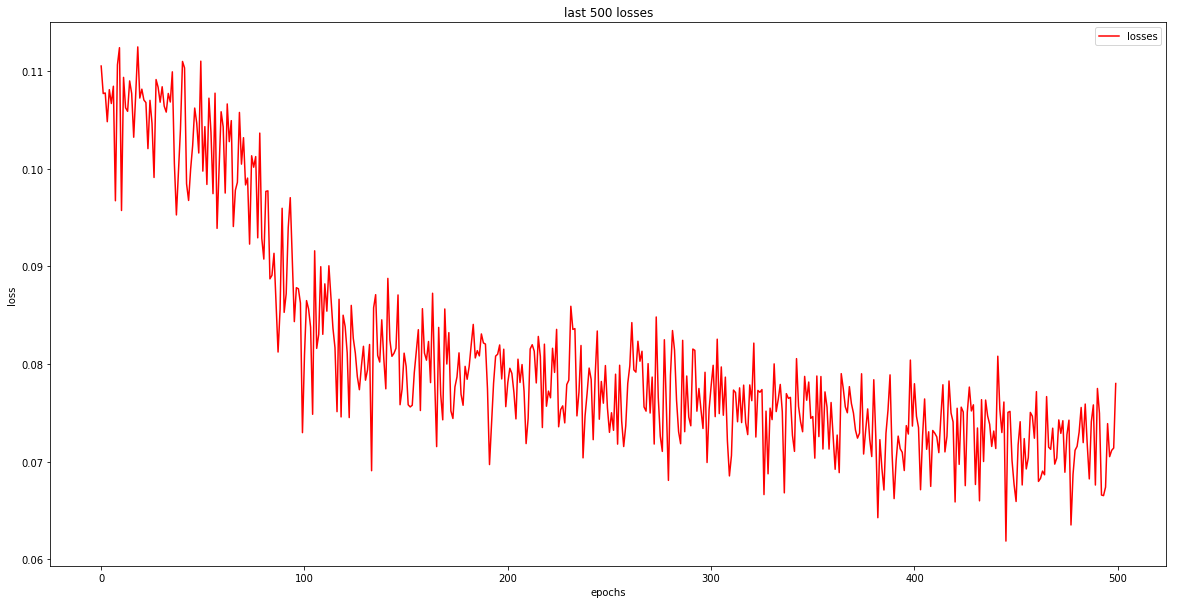

In [10]:
from plot_losses import plot_losses
plot_losses(losses)

Test Loss: 0.099259175


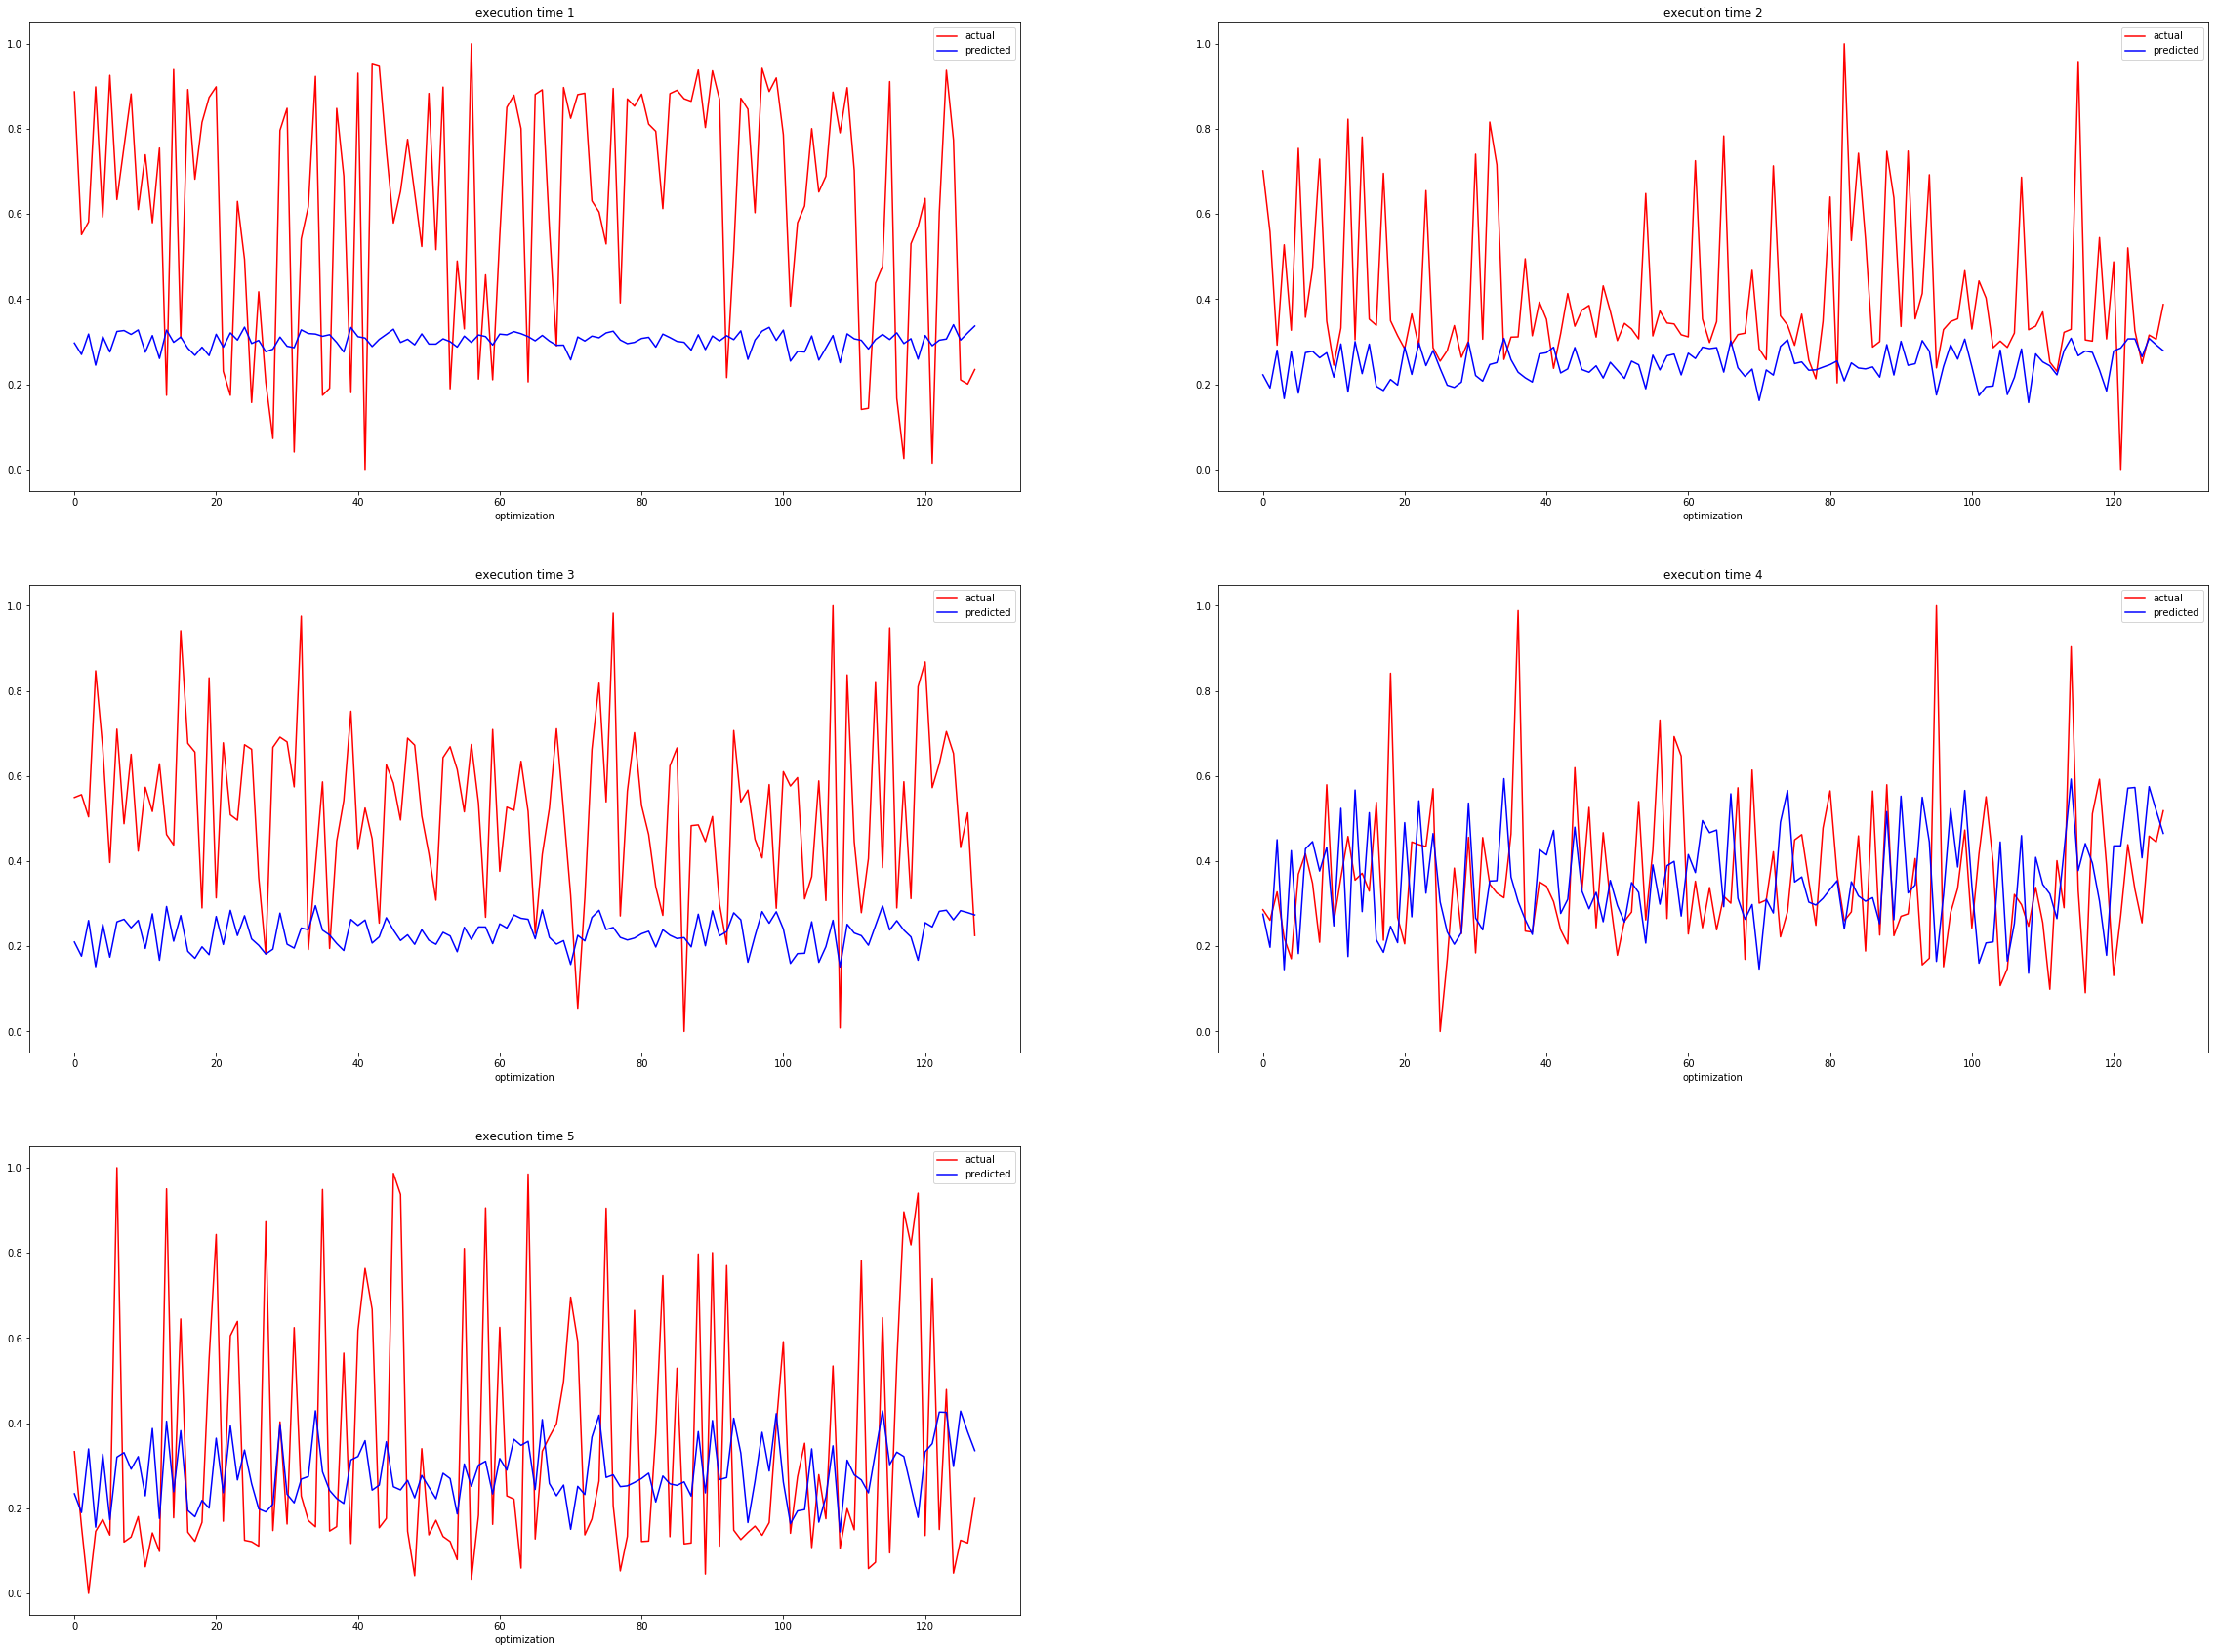

In [11]:
from sklearn.metrics import mean_squared_error

from predict import predict
from plot_execution_times import plot_execution_times
from test_set import test_set
test_set = test_set.to(device)
net.eval()


predictions = predict(net, 32, test_set)

print('Test Loss:', mean_squared_error(test_set[:,-5:], predictions))
plot_execution_times(predictions, test_set[:, -5:])

